In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preparing The Data

In [13]:
df = pd.read_csv('./datasets/train.csv')
df.shape

(42000, 785)

In [14]:
data = df.values
print(data.shape)

(42000, 785)


In [15]:
X = data[:,1:]
Y = data[:,0]
print(X.shape, Y.shape)

(42000, 784) (42000,)


In [16]:
split = int(0.8*X.shape[0])
print(split)
X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape, Y_train.shape)
print("-----------------------")
print(X_test.shape, Y_test.shape)

33600
(33600, 784) (33600,)
-----------------------
(8400, 784) (8400,)


In [17]:
def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.show()

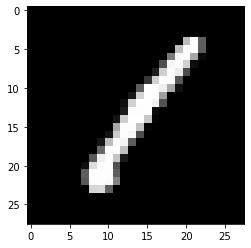

1


In [18]:
drawImg(X_train[0])
print(Y_train[0])

# Implementation of KNN

In [35]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2)) #euclidean distance

def knn(X,Y,queryPoint,k=5):
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    vals = vals[:k] #nearest k neighbours
    vals = np.array(vals)
    
    
    new_val = np.unique(vals[:,1], return_counts = True)
    max_freq_ind = new_val[1].argmax()
    pred = new_val[0][max_freq_ind]
    
    return pred

# Making Predictions

In [41]:
predictions = knn(X_train, Y_train, X_test[300])
print(int(predictions))

4


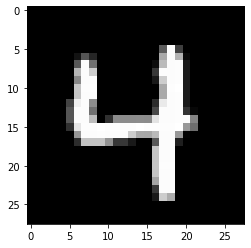

4


In [40]:
drawImg(X_test[300])
print(Y_test[300])